In [9]:
import numpy as np
from scipy import signal

In [2]:
x = np.array([[1, 1, 1, 0, 0],
                  [0, 1, 1, 1, 0],
                  [0, 0, 1, 1, 1],
                  [0, 0, 1, 1, 0],
                  [0, 1, 1, 0, 0]],
                 dtype='float')

In [13]:
x

array([[1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1.],
       [0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0.]])

In [420]:
filter_size=3
np.random.choice([-1,1,0],size=[filter_size,filter_size])

array([[ 1, -1, -1],
       [-1,  0,  0],
       [ 1, -1,  1]])

In [299]:
stride=1
filter_size=3

In [384]:
def calculate_sub_mat_indexs(mat,stride,filter_size):
    index_list=[]
    vertical_start_pos=[]
    i=0
    j=0
    while j<mat.shape[1]-1:
        j=(i+filter_size-1)
        index_list.append((i,j))
        vertical_start_pos.append(i)
        i+=stride
    return index_list, vertical_start_pos    

In [394]:
def find_submatrices(mat,index_list, vertical_start_pos,filter_size):
    v_mat=[]
    for v_start in vertical_start_pos:
        h_mat=[]
        for indexes in index_list:    
            sub_matrice=[]
            for vertical_start in range(v_start,v_start+filter_size):    
                sub_matrice.append(mat[vertical_start,][indexes[0]:indexes[1]+1])
            h_mat.append(np.array(sub_matrice))
        v_mat.append(h_mat)    
    return v_mat    

def print_sub_mats(v_mat):
    for h_mat_set in v_mat:
        aa=h_mat_set
        cc=''
        for j in range(aa[0].shape[0]):
            for i in range(len(aa)):
                cc=cc+str(aa[i][j])+" "
            cc=cc+'\n'
        print(cc)    
index_list, vertical_start_pos =calculate_sub_mat_indexs(x,1,3)
v_mat=find_submatrices(x,index_list, vertical_start_pos,3)
print_sub_mats(v_mat)

[1. 1. 1.] [1. 1. 0.] [1. 0. 0.] 
[0. 1. 1.] [1. 1. 1.] [1. 1. 0.] 
[0. 0. 1.] [0. 1. 1.] [1. 1. 1.] 

[0. 1. 1.] [1. 1. 1.] [1. 1. 0.] 
[0. 0. 1.] [0. 1. 1.] [1. 1. 1.] 
[0. 0. 1.] [0. 1. 1.] [1. 1. 0.] 

[0. 0. 1.] [0. 1. 1.] [1. 1. 1.] 
[0. 0. 1.] [0. 1. 1.] [1. 1. 0.] 
[0. 1. 1.] [1. 1. 0.] [1. 0. 0.] 



In [429]:
filt=np.random.choice([-1,1,0],size=[filter_size,filter_size])
print (filt)

v_mat[0][1] *filt

array([[-1.,  0.,  0.],
       [ 0.,  1.,  1.],
       [-0.,  0., -1.]])

In [433]:
for h_mat_set in v_mat:
    aa=h_mat_set
    cc=''
    for j in range(aa[0].shape[0]):
        for i in range(len(aa)):
            cc=cc+str(aa[i][j])+" "
        cc=cc+'\n'
    print(cc)    

[1. 1. 1.] [1. 1. 0.] [1. 0. 0.] 
[0. 1. 1.] [1. 1. 1.] [1. 1. 0.] 
[0. 0. 1.] [0. 1. 1.] [1. 1. 1.] 

[0. 1. 1.] [1. 1. 1.] [1. 1. 0.] 
[0. 0. 1.] [0. 1. 1.] [1. 1. 1.] 
[0. 0. 1.] [0. 1. 1.] [1. 1. 0.] 

[0. 0. 1.] [0. 1. 1.] [1. 1. 1.] 
[0. 0. 1.] [0. 1. 1.] [1. 1. 0.] 
[0. 1. 1.] [1. 1. 0.] [1. 0. 0.] 



In [441]:
tmp=v_mat[0][0]
tmp

array([[1., 1., 1.],
       [0., 1., 1.],
       [0., 0., 1.]])

In [495]:
res=tmp*filt

In [505]:
res

array([[-1.,  0.,  0.],
       [ 0.,  1.,  1.],
       [-0.,  0., -1.]])

In [556]:
np.array(convolve_res_ver)

array([[ 0.,  0., -2.],
       [ 0.,  0.,  0.],
       [ 0.,  1., -1.]])

In [560]:
print(v_mat[0])

[array([[1., 1., 1.],
       [0., 1., 1.],
       [0., 0., 1.]]), array([[1., 1., 0.],
       [1., 1., 1.],
       [0., 1., 1.]]), array([[1., 0., 0.],
       [1., 1., 0.],
       [1., 1., 1.]])]


In [565]:
def show_convolve_oper(v_mat,filt):
    convolve_res_ver=[]
    mat_index=0
    for h_mats in v_mat:
        mat_index+=1
        print("Showing Convolution for horizontal stack {}".format(mat_index))
        convolve_res_hor=[]
        for h_mat in h_mats:
            tmp=h_mat
            res=tmp*filt
            convolve_res_hor.append(np.sum(res))
            c='    I/P           K           O/P\n'
            mid_index=(len(list(range(tmp.shape[0])))-1)/2
            for i in range(tmp.shape[0]):
                c=c+str(tmp[i])
                if i==mid_index:
                    c=c+' *'
                c=c+"   "+str(filt[i])
                if i==mid_index:
                    c=c+' = '
                c=c+"  "+str(res[i])
                if i==mid_index:
                    c=c+' -> sum(O/P)-> ' +str(np.sum(res))
                c=c+'\n'
    #     mat_index+=1        
            print(c)
        convolve_res_ver.append(convolve_res_hor)
    return np.array(convolve_res_ver)    

In [566]:
convolve_res_ver=show_convolve_oper(v_mat,filt)

Showing Convolution for horizontal stack 1
    I/P           K           O/P
[1. 1. 1.]   [-1  0  0]  [-1.  0.  0.]
[0. 1. 1.] *   [0 1 1] =   [0. 1. 1.] -> sum(O/P)-> 0.0
[0. 0. 1.]   [-1  0 -1]  [-0.  0. -1.]

    I/P           K           O/P
[1. 1. 0.]   [-1  0  0]  [-1.  0.  0.]
[1. 1. 1.] *   [0 1 1] =   [0. 1. 1.] -> sum(O/P)-> 0.0
[0. 1. 1.]   [-1  0 -1]  [-0.  0. -1.]

    I/P           K           O/P
[1. 0. 0.]   [-1  0  0]  [-1.  0.  0.]
[1. 1. 0.] *   [0 1 1] =   [0. 1. 0.] -> sum(O/P)-> -2.0
[1. 1. 1.]   [-1  0 -1]  [-1.  0. -1.]

Showing Convolution for horizontal stack 2
    I/P           K           O/P
[0. 1. 1.]   [-1  0  0]  [-0.  0.  0.]
[0. 0. 1.] *   [0 1 1] =   [0. 0. 1.] -> sum(O/P)-> 0.0
[0. 0. 1.]   [-1  0 -1]  [-0.  0. -1.]

    I/P           K           O/P
[1. 1. 1.]   [-1  0  0]  [-1.  0.  0.]
[0. 1. 1.] *   [0 1 1] =   [0. 1. 1.] -> sum(O/P)-> 0.0
[0. 1. 1.]   [-1  0 -1]  [-0.  0. -1.]

    I/P           K           O/P
[1. 1. 0.]   [-1  0  0]  [-1.  0. 

In [567]:
convolve_res_ver

array([[ 0.,  0., -2.],
       [ 0.,  0.,  0.],
       [ 0.,  1., -1.]])

In [516]:
tmp=v_mat[0][0]
res=tmp*filt
c='    I/P           K           O/P\n'
mid_index=(len(list(range(tmp.shape[0])))-1)/2
for i in range(tmp.shape[0]):
    c=c+str(tmp[i])
    if i==mid_index:
        c=c+' *'
    c=c+"   "+str(filt[i])
    if i==mid_index:
        c=c+' = '
    c=c+"  "+str(res[i])
    if i==mid_index:
        c=c+' -> sum(O/P)-> ' +str(np.sum(res))
    c=c+'\n'    
print(c)    

    I/P           K           O/P
[1. 1. 1.]   [-1  0  0]  [-1.  0.  0.]
[0. 1. 1.] *   [0 1 1] =   [0. 1. 1.] -> sum(O/P)-> 0.0
[0. 0. 1.]   [-1  0 -1]  [-0.  0. -1.]



    I/P           K           O/P
[1. 1. 1.]   [-1  0  0]  [-1.  0.  0.]
[0. 1. 1.] *   [0 1 1] =   [0. 1. 1.]
[0. 0. 1.]   [-1  0 -1]  [-0.  0. -1.]
    I/P           K           O/P
[1. 1. 1.]   [-1  0  0]  [-1.  0.  0.]
[0. 1. 1.] *   [0 1 1] =   [0. 1. 1.]
[0. 0. 1.]   [-1  0 -1]  [-0.  0. -1.]



In [517]:
from PIL import Image, ImageDraw

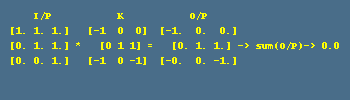

In [545]:
img = Image.new('RGB', (350, 100), color = (73, 109, 137))
d = ImageDraw.Draw(img)
d.text((10,10), c, fill=(255,255,0))
img

In [547]:
type(img
    )

PIL.Image.Image

In [469]:
filt

array([[-1,  0,  0],
       [ 0,  1,  1],
       [-1,  0, -1]])

In [330]:
filter_size=3
stride=2
index_list=[]
vertical_start_pos=[]
i=0
j=0
while j<x.shape[1]-1:
    j=(i+filter_size-1)
    index_list.append((i,j))
    vertical_start_pos.append(i)
    i+=stride
vertical_start_pos    

[0, 2]

In [334]:
range(vertical_start_pos[0],vertical_start_pos[-1])

range(0, 2)

In [305]:
vertical_start_pos

[0, 1, 2]

In [285]:
index_list, vertical_start_pos =calculate_sub_mat_indexs(x,stride,filter_size)

In [290]:
v_mat=find_submatrices(x,index_list, vertical_start_pos)

In [297]:
x[0,][0:4+1]

array([1., 1., 1., 0., 0.])

In [293]:
index_list

[(0, 4)]

In [319]:
index_list=[]
vertical_start_pos=[]
for i in range(x.shape[1]):
    j=(i+filter_size-1)
    print(i,j)
    index_list.append((i,j))
    vertical_start_pos.append(i)
    if j==x.shape[1]-1:
        break    

0 2
1 3
2 4


In [320]:
vertical_start_pos

[0, 1, 2]

In [336]:
v_mat

[[array([[1., 1., 1.],
         [0., 1., 1.]]), array([[1., 0., 0.],
         [1., 1., 0.]])], [array([[0., 0., 1.],
         [0., 0., 1.]]), array([[1., 1., 1.],
         [1., 1., 0.]])]]

In [344]:
vertical_start_pos1=vertical_start_pos

In [354]:
list(range(vertical_start_pos1[0],vertical_start_pos1[-1]))

[0, 1]

In [351]:
sub_matrice=[]
for vertical_start in range(vertical_start_pos1[0],vertical_start_pos1[-1]):    
    sub_matrice.append(x[vertical_start,][indexes[0]:indexes[1]+1])

In [352]:
sub_matrice

[array([1., 1., 1.]), array([0., 1., 1.])]

In [353]:
x

array([[1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1.],
       [0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0.]])

In [350]:
indexes=index_list[0]

In [362]:
vertical_start_pos

[0, 2]

In [377]:
filter_size=5

In [378]:
v_mat=[]
for v_start in vertical_start_pos:
    h_mat=[]
    for indexes in index_list:    
        sub_matrice=[]
        for vertical_start in range(v_start,v_start+filter_size):    
            sub_matrice.append(x[vertical_start,][indexes[0]:indexes[1]+1])
        h_mat.append(np.array(sub_matrice))
    v_mat.append(h_mat)    

In [379]:
v_mat

[[array([[1., 1., 1., 0., 0.],
         [0., 1., 1., 1., 0.],
         [0., 0., 1., 1., 1.],
         [0., 0., 1., 1., 0.],
         [0., 1., 1., 0., 0.]])]]

In [341]:
x

array([[1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1.],
       [0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0.]])

In [356]:
v_mat

[[array([[1., 1., 1.],
         [0., 1., 1.],
         [0., 0., 1.]]), array([[1., 0., 0.],
         [1., 1., 0.],
         [1., 1., 1.]])], [array([[0., 0., 1.],
         [0., 0., 1.],
         [0., 1., 1.]]), array([[1., 1., 1.],
         [1., 1., 0.],
         [1., 0., 0.]])]]

In [339]:
index_list

[(0, 2), (2, 4)]

In [338]:
vertical_start_pos

[0, 2]

In [316]:
vertical_start_pos1

[0, 2]

In [317]:
index_list

[(0, 2), (2, 4)]

In [242]:
def print_sub_mats(v_mat):
    for h_mat_set in v_mat:
        aa=h_mat_set
        cc=''
        for j in range(aa[0].shape[0]):
            for i in range(len(aa)):
                cc=cc+str(aa[i][j])+" "
            cc=cc+'\n'
        print(cc)    

In [380]:
print_sub_mats(v_mat)

[1. 1. 1. 0. 0.] 
[0. 1. 1. 1. 0.] 
[0. 0. 1. 1. 1.] 
[0. 0. 1. 1. 0.] 
[0. 1. 1. 0. 0.] 



In [244]:
x

array([[1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1.],
       [0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0.]])

In [239]:
x

array([[1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1.],
       [0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0.]])

In [137]:
np.array(sub_matrice)

array([[1., 1., 1.],
       [0., 1., 1.],
       [0., 0., 1.]])

In [129]:
np.array([x[0,][0:2+1],x[1,][0:2+1],x[2,][0:2+1]])

array([[1., 1., 1.],
       [0., 1., 1.],
       [0., 0., 1.]])

In [67]:
aa=[]
for indexes in index_list:    
    aa.append(np.array([x[0,][indexes[0]:indexes[1]+1],x[1,][indexes[0]:indexes[1]+1],x[2,][indexes[0]:indexes[1]+1]]))
A=np.array([x[0,][0:2+1],x[1,][0:2+1],x[2,][0:2+1]])
B=np.array([x[0,][1:3+1],x[1,][1:3+1],x[2,][1:3+1]])
C=np.array([x[0,][2:4+1],x[1,][2:4+1],x[2,][2:4+1]])

In [312]:
index_list

[(0, 2), (2, 4)]

In [153]:
z=zip()
for i in range(len(aa)):
    z=zip(z,aa[i])
# z=zip(unlist(aa))
# for item1,item2,item3 in z:
#     print(item1,item2,item3)

In [205]:
cc=''
for j in range(aa[0].shape[0]):
    for i in range(len(aa)):
        cc=cc+str(aa[i][j])+" "
    cc=cc+'\n'

In [206]:
print(cc)

[1. 1. 1.] [1. 1. 0.] [1. 0. 0.] 
[0. 1. 1.] [1. 1. 1.] [1. 1. 0.] 
[0. 0. 1.] [0. 1. 1.] [1. 1. 1.] 



In [176]:

for item in aa:
    print(item,end=" ")

[[1. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]] [[1. 1. 0.]
 [1. 1. 1.]
 [0. 1. 1.]] [[1. 0. 0.]
 [1. 1. 0.]
 [1. 1. 1.]] 

In [178]:
print(aa[0],end="  ")
print(aa[1])

[[1. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]  [[1. 1. 0.]
 [1. 1. 1.]
 [0. 1. 1.]]


In [169]:
print(str(aa[0])),print(str(aa[1]))

[[1. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]
[[1. 1. 0.]
 [1. 1. 1.]
 [0. 1. 1.]]


(None, None)

In [157]:
A

array([[1., 1., 1.],
       [0., 1., 1.],
       [0., 0., 1.]])

In [76]:
list(zip(A, B,C))

[(array([1., 1., 1.]), array([1., 1., 0.]), array([1., 0., 0.])),
 (array([0., 1., 1.]), array([1., 1., 1.]), array([1., 1., 0.])),
 (array([0., 0., 1.]), array([0., 1., 1.]), array([1., 1., 1.]))]

In [118]:
" "*4+"A"

'    A'

In [121]:
print(" "*4+"A"," "*9+"B"," "*9+"C")
# print("    A   ","    B","        C")
for item_a, item_b,item_c in zip(A, B,C):
    print(item_a, item_b,item_c)

    A          B          C
[1. 1. 1.] [1. 1. 0.] [1. 0. 0.]
[0. 1. 1.] [1. 1. 1.] [1. 1. 0.]
[0. 0. 1.] [0. 1. 1.] [1. 1. 1.]


In [111]:
" "*4

'    '

In [78]:
for item_a, item_b,item_c in zip(A, B,C):
    print(item_a, item_b,item_c)
print("\n")
for item_a, item_b,item_c in zip(A, B,C):
    print(item_a, item_b,item_c)    

[1. 1. 1.] [1. 1. 0.] [1. 0. 0.]
[0. 1. 1.] [1. 1. 1.] [1. 1. 0.]
[0. 0. 1.] [0. 1. 1.] [1. 1. 1.]


[1. 1. 1.] [1. 1. 0.] [1. 0. 0.]
[0. 1. 1.] [1. 1. 1.] [1. 1. 0.]
[0. 0. 1.] [0. 1. 1.] [1. 1. 1.]
